In [43]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
from sklearn.model_selection import GridSearchCV
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Loading Dataset

In [2]:
#Importing  the Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(3)

# Dep Var - Attrition ( Yes/No) - Binary Classification Problem 

# 34 - indepedent variable 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


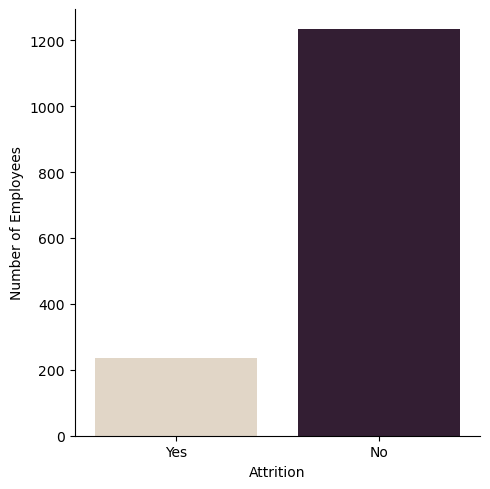

In [4]:
#Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df);
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

checking if any missing values in the dataframe. 

In [5]:
#Identifying columns with missing information
missing_col = df.columns[df.isnull().any().sort_values(ascending=False)].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Step 2 - Feature Engineering

The numeric and categorical fields need to be treated separately.The following few steps separate the numeric and categorical fields and drops the target field 'Attrition' from the feature set.

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df['JobRole'].head()

0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object

In [10]:
df.shape

(1470, 35)

In [11]:
#Extracting the Numeric and Categorical features
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


### 2.1 Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.

In [12]:
#Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head(5)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [13]:
#Combining the Categorical and Numeric features
df_transformed_final = pd.concat([df_num,df_cat_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 47)


In [14]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

X = df_transformed_final #Features
y = target #Target

Shape of target:  (1470,)


### 2.2 Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [15]:
#Splitting into Train and Test dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0, stratify = y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1176, 47)
Shape of X Test:  (294, 47)
Shape of y Train:  (1176,)
Shape of y Test:  (294,)


## Step 3 - Model Fitting



# Adaboost Classifier
##### The most important parameters are base_estimator, n_estimators and learning_rate.

##### 1. base_estimator  - It is the learning algorithm to use to train the weak models. The default Learning Algorithm is DecisionTreeClassifier with Max Depth of 1

#####  2. n_estimators - It is the number of models to iteratively train.

#####  3.learning_rate - It is the contribution of each model to the weights and default value for it is 1. There is a trade-off between learning_rate and n_estimators. Reducing the learning rate will forcing the model train slower (but sometimes resulting in better performance scores). Decreasing the learning rate L makes the coefficients α_m smaller, which reduces the amplitude of the sample_weights at each step (As per weight formula we use at each step for updating weights). 

In [31]:
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=1)


# No of Models 

# from sklearn.ensemble.AdaBoost
# Accuracy or AUC is chagin with no of Model ( Weak Models )

In [32]:
#Fitting Model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=1)

In [33]:
#pred
y_pred = adaboost.predict(X_test)


In [34]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.8707482993197279


In [35]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[247   0]
 [ 38   9]]


In [38]:
adaboost.feature_importances_

array([0.03 , 0.03 , 0.03 , 0.   , 0.   , 0.035, 0.045, 0.01 , 0.025,
       0.   , 0.04 , 0.135, 0.03 , 0.05 , 0.015, 0.   , 0.04 , 0.   ,
       0.065, 0.035, 0.035, 0.025, 0.02 , 0.015, 0.04 , 0.03 , 0.035,
       0.   , 0.025, 0.005, 0.01 , 0.005, 0.   , 0.   , 0.025, 0.   ,
       0.   , 0.015, 0.   , 0.   , 0.015, 0.015, 0.   , 0.01 , 0.   ,
       0.   , 0.06 ])

In [39]:
imp_df = pd.DataFrame({
    "Varname": X_test.columns,
    "Imp": adaboost.feature_importances_
})

In [41]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,MonthlyIncome,0.135
18,StockOptionLevel,0.065
46,OverTime_Yes,0.060
13,NumCompaniesWorked,0.050
6,EnvironmentSatisfaction,0.045
16,RelationshipSatisfaction,0.040
24,YearsSinceLastPromotion,0.040
10,JobSatisfaction,0.040
26,BusinessTravel_Travel_Frequently,0.035
5,EmployeeNumber,0.035


In [42]:
adaboost_tuned = AdaBoostClassifier(random_state=42)

In [46]:
# Create the parameter grid based on the results of random search 
params = {
    'n_estimators': [10, 30, 40, 50, 70, 100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 8, 10]
}

adaboost_tuned_cv_model = GridSearchCV(estimator=adaboost_tuned, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [52]:
%%time
adaboost_tuned_cv_model.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 934 ms, sys: 154 ms, total: 1.09 s
Wall time: 36 s


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                           1, 2, 5, 8, 10],
                         'n_estimators': [10, 30, 40, 50, 70, 100, 200, 300,
                                          400, 500]},
             scoring='accuracy', verbose=1)

In [53]:
adaboost_cv_best = adaboost_tuned_cv_model.best_estimator_
adaboost_cv_best

AdaBoostClassifier(learning_rate=0.3, n_estimators=100, random_state=42)

In [54]:
def evaluate_model(adaboost_classfier):
    print("Train Accuracy :", accuracy_score(y_train, adaboost_classfier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, adaboost_classfier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, adaboost_classfier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, adaboost_classfier.predict(X_test)))

In [55]:
evaluate_model(adaboost_cv_best)

Train Accuracy : 0.8937074829931972
Train Confusion Matrix:
[[981   5]
 [120  70]]
--------------------------------------------------
Test Accuracy : 0.8707482993197279
Test Confusion Matrix:
[[247   0]
 [ 38   9]]


In [56]:
adaboost_important_features_df = pd.DataFrame({
    "Varname": X_test.columns,
    "Imp": adaboost_cv_best.feature_importances_
})

In [57]:
adaboost_important_features_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,MonthlyIncome,0.12
46,OverTime_Yes,0.07
18,StockOptionLevel,0.07
6,EnvironmentSatisfaction,0.05
10,JobSatisfaction,0.05
13,NumCompaniesWorked,0.05
16,RelationshipSatisfaction,0.04
28,Department_Research & Development,0.04
26,BusinessTravel_Travel_Frequently,0.04
24,YearsSinceLastPromotion,0.04
